In [1]:
#importing the required libraries

import pandas as pd
import seaborn as sns

In [2]:
#reading the movies dataset and assigning it to a variable called movies
movies = pd.read_csv(r"C:\Users\admin\Downloads\movie_data\movies.csv")

In [3]:
## movies shape

movies.shape

(9742, 3)

In [4]:
## reading the ratings dataset and assigning it to a variable called ratings

ratings = pd.read_csv(r"C:\Users\admin\Downloads\movie_data\ratings.csv")

In [5]:
ratings.shape

(100836, 4)

In [6]:
# getting the number of unique values in ratings user id

ratings.nunique()

userId         610
movieId       9724
rating          10
timestamp    85043
dtype: int64

In [7]:
## merging the movies 

df = pd.merge(ratings,movies, on='movieId')

In [8]:
df.sample(15)

,userId,movieId,rating,timestamp,title,genres
74120,135,1792,2.0,1009691393,U.S. Marshals (1998),Action|Crime|Thriller
42147,382,56949,3.0,1515172900,27 Dresses (2008),Comedy|Romance
71515,271,1120,4.0,1234301707,"People vs. Larry Flynt, The (1996)",Comedy|Drama
24559,215,4226,4.0,1260908721,Memento (2000),Mystery|Thriller
88223,298,2495,2.5,1450452376,"Fantastic Planet, The (Planète sauvage, La) (1...",Animation|Sci-Fi
55398,18,54272,3.5,1455232001,"Simpsons Movie, The (2007)",Animation|Comedy
19803,444,509,4.0,832679824,"Piano, The (1993)",Drama|Romance
54871,561,44191,3.0,1491090915,V for Vendetta (2006),Action|Sci-Fi|Thriller|IMAX
79734,380,6880,3.0,1494071627,"Texas Chainsaw Massacre, The (2003)",Horror
92999,414,2035,3.0,1016114875,Blackbeard's Ghost (1968),Children|Comedy


In [10]:
# using the groupby method to get the count of ratings

most_rated = df.groupby('title')['rating'].count()

most_rated_movie = most_rated.idxmax()
print(most_rated_movie)

Forrest Gump (1994)


In [11]:
## reading the tags dataset and assigning it to a variable

tags = pd.read_csv(r"C:\Users\admin\Downloads\movie_data\tags.csv")
tags.sample(10)

,userId,movieId,tag,timestamp
2338,474,8338,religion,1138039973
447,125,7022,social commentary,1474381788
2752,477,72998,superficial plot,1262707525
1072,474,293,hit men,1138137619
1965,474,4979,new york,1137271220
2430,474,30850,Shakespeare,1137181555
1444,474,1411,Shakespeare,1137191597
1739,474,3098,baseball,1137201875
3243,567,122916,humor,1525285285
2503,477,541,atmospheric,1262795768


In [12]:
tags.shape

(3683, 4)

In [13]:
## combining the tags dataset and movies dataset on common column "MovieID"

tag_df = pd.merge(tags,movies,on='movieId',how='inner')
tag_df.head(10)

,userId,movieId,tag,timestamp,title,genres
0,2,60756,funny,1445714994,Step Brothers (2008),Comedy
1,2,60756,Highly quotable,1445714996,Step Brothers (2008),Comedy
2,2,60756,will ferrell,1445714992,Step Brothers (2008),Comedy
3,62,60756,comedy,1528934384,Step Brothers (2008),Comedy
4,62,60756,funny,1528934381,Step Brothers (2008),Comedy
5,62,60756,will ferrell,1528934379,Step Brothers (2008),Comedy
6,424,60756,funny,1457846127,Step Brothers (2008),Comedy
7,424,60756,will ferrell,1457846129,Step Brothers (2008),Comedy
8,2,89774,Boxing story,1445715207,Warrior (2011),Drama
9,2,89774,MMA,1445715200,Warrior (2011),Drama


In [20]:
## boolean indexing

matrix = tag_df[(tag_df['title']== "Matrix, The (1999)")]

matrix['tag'].unique()

array(['martial arts', 'sci-fi', 'alternate universe', 'philosophy',
       'post apocalyptic'], dtype=object)

In [19]:
## bolean indexing for terminator movie and printing the average ratings

terminator = df[(df['title']=="Terminator 2: Judgment Day (1991)")]

print(terminator['rating'].mean())

3.970982142857143


C:\Users\admin\AppData\Local\Temp\ipykernel_3432\1066621547.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fight_club['rating'])


the skewness of the fight club movie ratings: -1.8603186380018706


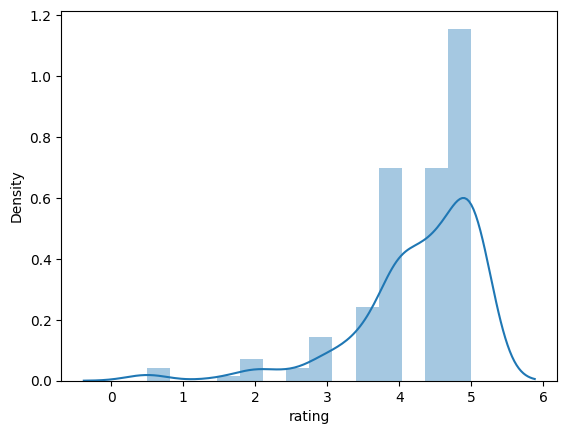

In [32]:
fight_club = df[(df['title']=="Fight Club (1999)")]

sns.distplot(fight_club['rating'])

print("the skewness of the fight club movie ratings:",fight_club['rating'].skew())

In [69]:
## Important Note:1 grouping the user ratings based on the movieId


grouped_df_count =df.groupby('movieId',as_index=False)['rating'].count()
grouped_df_mean =df.groupby('movieId',as_index=False)['rating'].mean()

In [70]:
## 2. 
filtered_df = pd.merge(movies,grouped_df_count,on='movieId',how='inner')

In [71]:
combined_df = pd.merge(filtered_df,grouped_df_mean,on='movieId',how='inner')
#combined_df.rename(columns={'rating_x':'ratings','rating_y':'ratings_count','rating':'ratings_mean'},inplace=True)
combined_df

,movieId,title,genres,rating_x,rating_y
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7,2.357143
4,5,Father of the Bride Part II (1995),Comedy,49,3.071429
...,...,...,...,...,...
9719,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,1,4.000000
9720,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,1,3.500000
9721,193585,Flint (2017),Drama,1,3.500000
9722,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,1,3.500000


In [74]:
## filtering the movies which got more than 50 user ratings

top_ratings = combined_df[(combined_df['rating_x']>50)]

In [77]:
A = top_ratings.groupby('title')['rating_x'].mean()
A.idxmax()

'Forrest Gump (1994)'

In [78]:
filtered = pd.merge(df,grouped_df_count,on='movieId',how='inner')

In [84]:
combine = pd.merge(filtered,grouped_df_mean,on='movieId',how='inner')
fifty = combine[(combine['rating_y']>50)]
a = fifty.groupby('title')['rating_x'].mean()
a.idxmax()

'Shawshank Redemption, The (1994)'

In [95]:
pd.set_option("display.max_rows",None)

fifty.groupby(['title','genres'],as_index=False)['rating_y'].max().sort_values(by='rating_y',ascending=False)

,title,genres,rating_y
156,Forrest Gump (1994),Comedy|Drama|Romance|War,329
343,"Shawshank Redemption, The (1994)",Crime|Drama,317
314,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307
350,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279
260,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278
376,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251
226,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238
69,Braveheart (1995),Action|Drama|War,237
385,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224
336,Schindler's List (1993),Drama|War,220


In [100]:
links_df = pd.read_csv(r"C:\Users\admin\Downloads\movie_data\links.csv")
links_df.head(8)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
5,6,113277,949.0
6,7,114319,11860.0
7,8,112302,45325.0


In [101]:
All_df = pd.merge(links_df,fifty,on='movieId',how='inner')
All_df.head()

,movieId,imdbId,tmdbId,userId,rating_x,timestamp,title,genres,rating_y,rating
0,1,114709,862.0,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.92093
1,1,114709,862.0,5,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.92093
2,1,114709,862.0,7,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.92093
3,1,114709,862.0,15,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.92093
4,1,114709,862.0,17,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.92093


In [133]:
Top_50 = All_df[(All_df['rating_y']>50)]
